In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

df = pd.read_csv('zillow-carlifornia.csv')
df = df.rename(columns={'MedianSoldPrice_AllHomes.California':'MedianSoldPrice'})
df.index = pd.DatetimeIndex(df.Date)
df.dropna(inplace = True)

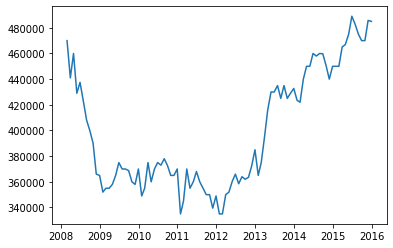

In [2]:
plt.plot(df['MedianSoldPrice'])
plt.show()

In [3]:
df.MedianSoldPrice.shift(0)

Date
2008-02-29    470000.0
2008-03-31    441000.0
2008-04-30    460000.0
2008-05-31    429000.0
2008-06-30    437500.0
                ...   
2015-08-31    475000.0
2015-09-30    470000.0
2015-10-31    470000.0
2015-11-30    485750.0
2015-12-31    485000.0
Name: MedianSoldPrice, Length: 95, dtype: float64

In [4]:
df_ts=pd.DataFrame()
for i in range(0, 12, 1):
    df_shift = df.MedianSoldPrice.shift(i).rename(f'MedianSoldPrice_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
for i in range(1, 5, 1):
    df_shift = df.MedianMortageRate.shift(i).rename(f'MedianMortageRate_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
for i in range(1, 5, 1):
    df_shift = df.UnemploymentRate.shift(i).rename(f'UnemploymentRate_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
df_ts = df_ts.dropna()
df_ts

,MedianSoldPrice_0,MedianSoldPrice_1,MedianSoldPrice_2,MedianSoldPrice_3,MedianSoldPrice_4,MedianSoldPrice_5,MedianSoldPrice_6,MedianSoldPrice_7,MedianSoldPrice_8,MedianSoldPrice_9,MedianSoldPrice_10,MedianSoldPrice_11,MedianMortageRate_1,MedianMortageRate_2,MedianMortageRate_3,MedianMortageRate_4,UnemploymentRate_1,UnemploymentRate_2,UnemploymentRate_3,UnemploymentRate_4
2009-01-31,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,470000.0,5.79,5.89,5.64,6.03,6.2,5.6,5.7,6.5
2009-02-28,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,5.04,5.79,5.89,5.64,6.3,6.2,5.6,5.7
2009-03-31,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,4.72,5.04,5.79,5.89,7.8,6.3,6.2,5.6
2009-04-30,358000.0,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,4.77,4.72,5.04,5.79,8.3,7.8,6.3,6.2
2009-05-31,365000.0,358000.0,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,4.64,4.77,4.72,5.04,8.8,8.3,7.8,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,459750.0,3.87,3.85,3.73,3.79,5.3,5.6,5.4,5.4
2015-09-30,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,3.95,3.87,3.85,3.73,5.2,5.3,5.6,5.4
2015-10-31,470000.0,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,3.87,3.95,3.87,3.85,5.1,5.2,5.3,5.6
2015-11-30,485750.0,470000.0,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,3.80,3.87,3.95,3.87,5.0,5.1,5.2,5.3


In [ ]:
# df_ts = pd.concat([df_ts, df.MedianMortageRate.shift(1),df.UnemploymentRate.shift(1)],1)
# df_ts = df_ts.dropna()
# df_ts

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
x = df_ts[df_ts.columns[1:]]
y = df_ts[df_ts.columns[0]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test)

(19976.2846251867, 16236.617647058823, 0.03589886485507708)

In [6]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test)

(20411.701098356716, 16599.059482738918, 0.03674165200545101)

In [7]:
def ml_ts(model):
    y_pred = []
    cv_len = len(x_test)
    start = len(x_train)
    for t in range(cv_len):
        x_tr = x[:start+t-1]
        y_tr = y[:start+t-1]
        rf = model
        rf.fit(x_tr,y_tr)
        y_pred.append(rf.predict(np.array(x.iloc[start+t,:]).reshape(1,-1)))
    return y_pred,(np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test))

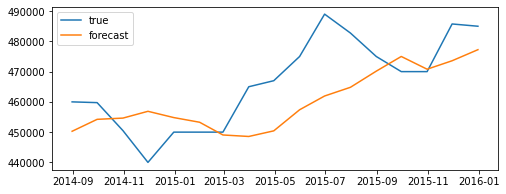

(12431.754496165904, 10084.70588235294, 0.021952937361535887)


In [8]:
y_pred, metrics = ml_ts(RandomForestRegressor(n_estimators = 100))
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,y_pred,label='forecast')
plt.legend()
plt.show()
print(metrics)

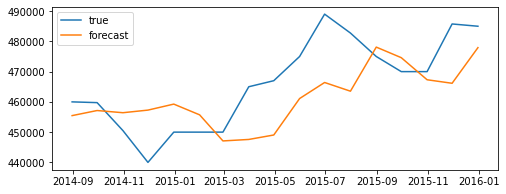

(12506.004611886678, 10375.862784372674, 0.022552218958071676)


In [9]:

y_pred, metrics = ml_ts(GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1))
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,y_pred,label='forecast')
plt.legend()
plt.show()
print(metrics)

In [10]:
zip(range(1,11), range)

,MedianSoldPrice_1,MedianSoldPrice_2,MedianSoldPrice_3,MedianSoldPrice_4,MedianSoldPrice_5,MedianSoldPrice_6,MedianSoldPrice_7,MedianSoldPrice_8,MedianSoldPrice_9,MedianSoldPrice_10,MedianSoldPrice_11,MedianMortageRate_1,MedianMortageRate_2,MedianMortageRate_3,MedianMortageRate_4,UnemploymentRate_1,UnemploymentRate_2,UnemploymentRate_3,UnemploymentRate_4
2009-01-31,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,470000.0,5.79,5.89,5.64,6.03,6.2,5.6,5.7,6.5
2009-02-28,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,5.04,5.79,5.89,5.64,6.3,6.2,5.6,5.7
2009-03-31,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,4.72,5.04,5.79,5.89,7.8,6.3,6.2,5.6
2009-04-30,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,4.77,4.72,5.04,5.79,8.3,7.8,6.3,6.2
2009-05-31,358000.0,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,4.64,4.77,4.72,5.04,8.8,8.3,7.8,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,459750.0,3.87,3.85,3.73,3.79,5.3,5.6,5.4,5.4
2015-09-30,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,3.95,3.87,3.85,3.73,5.2,5.3,5.6,5.4
2015-10-31,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,3.87,3.95,3.87,3.85,5.1,5.2,5.3,5.6
2015-11-30,470000.0,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,3.80,3.87,3.95,3.87,5.0,5.1,5.2,5.3


In [23]:
col_order = sorted(x.columns, key = lambda x: int(x.split('_')[1]), reverse = True)
x = x.copy()[col_order]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [75]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(x_train.shape[1]))
x1 = layers.Flatten()(inputs)
x1 = layers.Dense(8, activation="relu")(x1)
outputs = layers.Dense(1)(x1)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("zillow_dense.keras",
                                    save_best_only=True)
]
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])
history = model.fit(x = x_train, y = y_train,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/50
3/3 [==============================] - 1s 176ms/step - loss: 392531804160.0000 - mape: 164.3511 - val_loss: 307729530880.0000 - val_mape: 118.8780
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 182746939392.0000 - mape: 112.1343 - val_loss: 138046144512.0000 - val_mape: 79.5360
Epoch 3/50
3/3 [==============================] - 0s 38ms/step - loss: 77386637312.0000 - mape: 72.3568 - val_loss: 39158136832.0000 - val_mape: 42.1789
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 20412686336.0000 - mape: 36.2982 - val_loss: 9336711168.0000 - val_mape: 20.5529
Epoch 5/50
3/3 [==============================] - 0s 36ms/step - loss: 4297321472.0000 - mape: 15.8103 - val_loss: 437313152.0000 - val_mape: 3.8543
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 620813248.0000 - mape: 5.0599 - val_loss: 2136421120.0000 - val_mape: 9.6917
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 3196668672.00

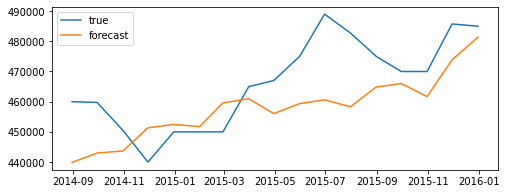

0.02452613864000983

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as MAPE
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,np.concatenate(model.predict(x_test)),label='forecast')
plt.legend()
plt.show()
MAPE(np.concatenate(model.predict(x_test)), y_test)

In [136]:
a = x_train.columns
col = []
for i in a:
  if 'MedianSoldPrice_' in i: 
    col.append(i)


inputs = keras.Input(shape=(x_train[col].shape[1]))
x1 = layers.Reshape((x_train[col].shape[1], 1))(inputs)
x1 = layers.LSTM(4)(x1)
x1 = layers.Dense(2, activation="relu")(x1)
outputs = layers.Dense(1)(x1)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
optimizer = keras.optimizers.Adam(lr=5)
model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])
history = model.fit(x = x_train[col], y = y_train,
                    epochs=100,
                    validation_data=(x_test[col], y_test),
                    callbacks=callbacks)

optimizer = keras.optimizers.Adam(lr=1)
model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])
history = model.fit(x = x_train[col], y = y_train,
                    epochs=100,
                    validation_data=(x_test[col], y_test),
                    callbacks=callbacks)

Epoch 1/100
3/3 [==============================] - 4s 333ms/step - loss: 144784408576.0000 - mape: 99.9720 - val_loss: 216516263936.0000 - val_mape: 99.7700
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 143701508096.0000 - mape: 99.5927 - val_loss: 213593800704.0000 - val_mape: 99.0931
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 140985270272.0000 - mape: 98.6400 - val_loss: 208435822592.0000 - val_mape: 97.8870
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 136456609792.0000 - mape: 97.0080 - val_loss: 200826093568.0000 - val_mape: 96.0800
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 129920548864.0000 - mape: 94.6213 - val_loss: 190614011904.0000 - val_mape: 93.6002
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 121356730368.0000 - mape: 91.3744 - val_loss: 177767366656.0000 - val_mape: 90.3842
Epoch 7/100
3/3 [==============================] - 0s 35ms/step

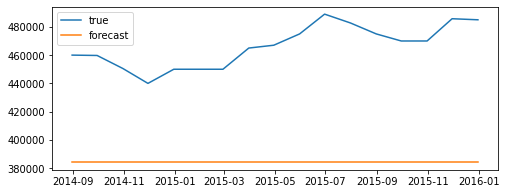

0.21365595929905062

In [137]:
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,np.concatenate(model.predict(x_test[col])),label='forecast')
plt.legend()
plt.show()
MAPE(np.concatenate(model.predict(x_test[col])), y_test)